## e-CARE: Multiple Choice

Dataset Source: https://huggingface.co/datasets/12ml/e-CARE

#### Install Necessary Libraries

In [1]:
%pip install pip -U
%pip install torch datasets
%pip install transformers tensorboard
%pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/46/3e/e1a12ac147ad460f67bd59ce9fede8470be4fa7e5b27dc53ba87135c6c15/datasets-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b77978ce611eb7a146a832/dill-0.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/13/c3/e942893f4864a424514c81640f114980cfd5aff7e7414d1e0255f4571111/xxhash-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/35/a8/36d8d7b3e46b377800d8dec4789

#### Enter HuggingFace Access Token

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


#### Import Necessary Libraries

In [3]:
import os, sys, random, ast
os.environ['TOKENIZERS_PARALLELISM']='false'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datasets
from datasets import Dataset, DatasetDict, load_dataset

import torch

from dataclasses import dataclass

import transformers
from transformers import AutoTokenizer, AutoModelForMultipleChoice
from transformers import Trainer, TrainingArguments, set_seed
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy

from typing import Optional, Union

!git lfs install

Git LFS initialized.


#### Display Library Versions

In [4]:
print("Python:".rjust(15), sys.version[0:6])
print("NumPy:".rjust(15), np.__version__)
print("Pandas:".rjust(15), pd.__version__)
print("Torch:".rjust(15), torch.__version__)
print("Datasets:".rjust(15), datasets.__version__)
print("Transformers:".rjust(15), transformers.__version__)

        Python: 3.10.1
         NumPy: 1.22.4
        Pandas: 1.5.3
         Torch: 2.0.1+cu118
      Datasets: 2.14.2
  Transformers: 4.31.0


#### Load Dataset & Convert To Pandas DataFrame

In [5]:
data = load_dataset("12ml/e-CARE")

data = data.rename_columns({"premise": "context",
                            "choice1": "0",
                            "choice2": "1",
                            "label": "labels",
                            })

data.set_format(type="pandas")

df = pd.concat([data['train'][:], data['validation'][:]])

df = df.dropna(how='all')

df = df.drop_duplicates(subset='context')

df = df.drop(columns=["idx", "conceptual_explanation"])

df

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

,context,question,0,1,labels
0,There is a light rain today.,effect,The roots of many plants are not moistened by ...,Tourists have seen many ripples.,0
1,Susan wants to buy a restricted pesticide.,effect,She bought rotenone.,He decided to buy amylase.,0
2,His parents stopped him.,cause,The child ran towards hippos.,Mike wanted to have a bird who has the lest nu...,0
3,The shamans were to start their sacred ceremon...,effect,They disappear immediately after finishing eat...,They moved to a cave.,1
4,She mainly studied drugs.,cause,Lily likes the art form of truth.,Susan majored in pharmacology at university.,1
...,...,...,...,...,...
2114,Her body had excessive radiation levels.,cause,Amy overexposed her skin to the ultraviolet ra...,Madame Curie studied radium all her life.,1
2115,Their company has a team culture.,effect,They have unified structures.,"Everyone, including the boss, is a team player.",1
2116,The old man ate Benzodiazepines by mistake.,effect,He was poisoned.,He had amnesia.,1
2119,He tried to caught the bass.,effect,He bass bit him with its small mouth.,The bass opened its mouth and guzzled his hand.,1


#### Visual: Word Length of Training Dataset Inputs

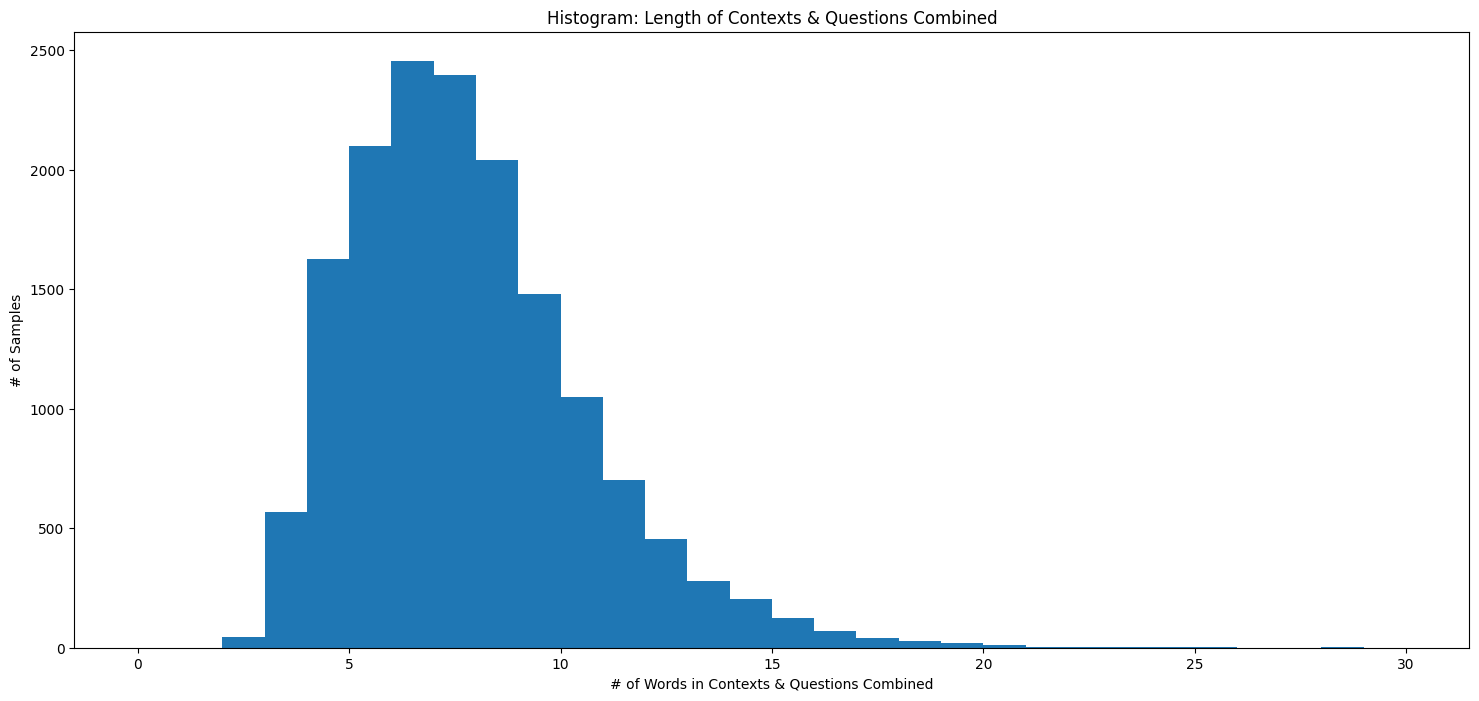

The maximum length of the questions (in words) is 28 words.


In [6]:
df['input_length'] = df['context'].str.split().str.len()

n_bin= 30
df.hist('input_length', grid=False, figsize=(18,8), range=(0,n_bin), bins=n_bin)
plt.title('Histogram: Length of Contexts & Questions Combined')
plt.xlabel('# of Words in Contexts & Questions Combined')
plt.ylabel('# of Samples')
plt.show()

print(f"The maximum length of the questions (in words) is {max(df['input_length'])} words.")

df = df.drop(columns=['input_length'])

#### Convert from DataFrame to Dataset & Split into Training/Testing/Evaluation Datasets

In [7]:
dataset = Dataset.from_pandas(df)

train_testeval = dataset.train_test_split(test_size=0.20)
test_eval = train_testeval['test'].train_test_split(test_size=0.50)

ds = DatasetDict({
    'train' : train_testeval['train'],
    'test' : test_eval['train'],
    'eval' : test_eval['test'],
})

print("Training Dataset Shape:", ds['train'].shape)
print("Testing Dataset Shape:", ds['test'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)

print(ds['train'].features)

Training Dataset Shape: (12563, 6)
Testing Dataset Shape: (1570, 6)
Evaluation Dataset Shape: (1571, 6)
{'context': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), '0': Value(dtype='string', id=None), '1': Value(dtype='string', id=None), 'labels': Value(dtype='int64', id=None), '__index_level_0__': Value(dtype='int64', id=None)}


#### Display Example

In [8]:
ds['train'][12]

{'context': 'Rose is a millionaire.',
 'question': 'effect',
 '0': 'Rose has a lot of big houses and companies.',
 '1': 'Her sunglasses protect the delicate skin around the eyes.',
 'labels': 0,
 '__index_level_0__': 2186}

#### Create Function to Display an Example Sample

In [9]:
def show_one_example(sample):
    print(f"Context: {sample['context']} {sample['question']}:")
    print(f"Option 0: {sample['0']}")
    print(f"Option 1: {sample['1']}")
    print(f"\nGround Truth: Option {sample['labels']}")

#### Display an Example Sample

In [10]:
show_one_example(ds['train'][12])

Context: Rose is a millionaire. effect:
Option 0: Rose has a lot of big houses and companies.
Option 1: Her sunglasses protect the delicate skin around the eyes.

Ground Truth: Option 0


#### Basic Values/Constants

In [11]:
MODEL_CKPT = "bert-base-uncased"
MODEL_NAME = MODEL_CKPT.split("/")[-1] + "-e_CARE"

STRATEGY = "epoch"
LEARNING_RATE = 5e-5

BATCH_SIZE = 16
NUM_OF_EPOCHS = 5

WEIGHT_DECAY = 0.01
REPORTS_TO = "tensorboard"

set_seed = 42

#### Instantiate Tokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT,
                                          use_fast=True)

#### Create Preprocessing Function

In [13]:
ending_names = ["0", "1"]

def preprocess_function(samples):
    first_sentences = [[context] * len(ending_names) for context in samples['context']]

    question_headers = samples['question']
    second_sentences = [[f"{header} {samples[end][i]}" for end in ending_names] for i, header in enumerate(question_headers)]

    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])

    tokenized_samples = tokenizer(first_sentences, second_sentences, truncation=True)
    return {k: [v[i:i + len(ending_names)] for i in range(0, len(v), len(ending_names))] for k, v in tokenized_samples.items()}

#### Apply Preprocessing Function to Dataset

In [14]:
encoded_ds = ds.map(preprocess_function,
                    batched=True)

Map:   0%|          | 0/12563 [00:00<?, ? examples/s]

Map:   0%|          | 0/1570 [00:00<?, ? examples/s]

Map:   0%|          | 0/1571 [00:00<?, ? examples/s]

In [15]:
encoded_ds['train'].features

{'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 '0': Value(dtype='string', id=None),
 '1': Value(dtype='string', id=None),
 'labels': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None)}

#### Instantiate Model

In [16]:
model = AutoModelForMultipleChoice.from_pretrained(MODEL_CKPT)

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Define TrainingArguments

In [17]:
args = TrainingArguments(
    output_dir=MODEL_NAME,
    evaluation_strategy=STRATEGY,
    learning_rate=LEARNING_RATE,
    auto_find_batch_size=True,
    num_train_epochs=NUM_OF_EPOCHS,
    weight_decay=WEIGHT_DECAY,
    report_to=REPORTS_TO,
    logging_first_step=True,
    logging_steps=125,
    save_strategy=STRATEGY,
    load_best_model_at_end=True,
    hub_private_repo=True,
    group_by_length=True,
    push_to_hub=True
)

#### Define Data Collator Class

In [18]:
@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad inputs
    for the multiple choices received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()}
                               for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])

        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        # Unflatten
        batch = {k: v.view(batch_size,
                           num_choices,
                           -1)
                 for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels,
                                       dtype=torch.int64)
        return batch

#### Create Function to Compute Metrics

In [19]:
def compute_metrics(predictions):
    preds, labels = predictions
    preds = np.argmax(preds, axis=1)
    return {"accuracy": (preds == labels).astype(np.float32).mean().item()}

#### Instantiate Trainer

In [20]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["eval"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/DunnBC22/bert-base-uncased-e_CARE into local empty directory.


#### Train Model

In [21]:
train_results = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.563700,0.528169,0.724379
2,0.345000,0.666718,0.732018
3,0.109800,1.311321,0.725652
4,0.021200,1.819388,0.722470
5,0.018500,1.767700,0.721197


#### Push to HuggingFace Hub

In [22]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file runs/Aug02_21-21-28_3a821f191617/events.out.tfevents.1691011303.3a821f191617.187.0:   0%|         …

To https://huggingface.co/DunnBC22/bert-base-uncased-e_CARE
   08972f7..d5da9ae  main -> main

   08972f7..d5da9ae  main -> main

To https://huggingface.co/DunnBC22/bert-base-uncased-e_CARE
   d5da9ae..660175a  main -> main

   d5da9ae..660175a  main -> main



'https://huggingface.co/DunnBC22/bert-base-uncased-e_CARE/commit/d5da9ae9b0a07a0e4f7dca406d1a127b092bd31e'

#### Save & Log Model

In [23]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =        5.0
  total_flos               =  1954171GF
  train_loss               =     0.2091
  train_runtime            = 0:20:16.26
  train_samples_per_second =     51.646
  train_steps_per_second   =      6.458


### Notes & Other Takeaways From This Project
****
- Since each sample has two options for answers, I was expecting better results.

****

#### Citation

- Model Checkpoint
    > @article{DBLP:journals/corr/abs-1810-04805, author = {Jacob Devlin and Ming{-}Wei Chang and Kenton Lee and Kristina Toutanova}, title = {{BERT:} Pre-training of Deep Bidirectional Transformers for Language Understanding}, journal = {CoRR}, volume = {abs/1810.04805}, year = {2018}, url = {http://arxiv.org/abs/1810.04805%7D, archivePrefix = {arXiv}, eprint = {1810.04805}, timestamp = {Tue, 30 Oct 2018 20:39:56 +0100}, biburl = {https://dblp.org/rec/journals/corr/abs-1810-04805.bib%7D, bibsource = {dblp computer science bibliography, https://dblp.org%7D}

- Dataset References
    > Du, L., Ding, X., Xiong, K., Liu, T., & Qin, B. (2022). e-CARE: a New Dataset for Exploring Explainable Causal Reasoning. arXiv preprint arXiv:2205.05849.

    > Roemmele, M., Bejan, C., and Gordon, A. (2011) Choice of Plausible Alternatives: An Evaluation of Commonsense Causal Reasoning. AAAI Spring Symposium on Logical Formalizations of Commonsense Reasoning, Stanford University, March 21-23, 2011.